In [2]:
def search_images(term, max_images=100):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [3]:
classes = ['goat', 'llama', 'sheep']
classesPath = []

for i in classes :
  download_url(search_images(f"{i} photos", max_images=1)[0], f"{i}.jpg", show_progress=False)
  classesPath.append(f"{i}.jpg")

Searching for 'goat photos'
Searching for 'llama photos'
Searching for 'sheep photos'


In [5]:
def displayImages(image_list, image_size):
  images = [Image.open(img).to_thumb(image_size) for img in image_list]
  label = [i.split(".")[0] for i in image_list]
  show_image_batch((images, classes), items= len(images))

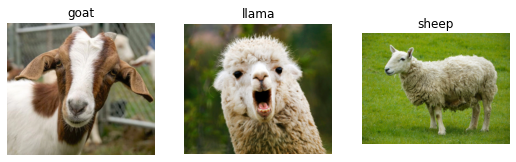

In [6]:
displayImages(classesPath, 300)

In [7]:
path = Path("Goat_Llama_Sheep")
"""for o in classes:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    resize_images(path/o, max_size=300, dest=path/o, max_workers=4)"""

"for o in classes:\n    dest = (path/o)\n    dest.mkdir(exist_ok=True, parents=True)\n    download_images(dest, urls=search_images(f'{o} photo'))\n    resize_images(path/o, max_size=300, dest=path/o, max_workers=4)"

In [47]:
for fn in get_image_files(path):
    passed = verify_image(fn)
    if not passed:
        os.unlink(fn)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


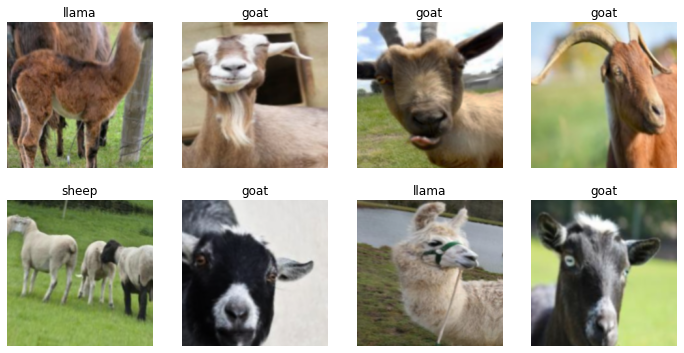

In [8]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish'), RandomResizedCrop(224, min_scale=0.5)],
    batch_tfms=aug_transforms()
).dataloaders(path)

dls.show_batch(max_n=8)

In [9]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

C:\Users\Teguh Ramadhan\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\Teguh Ramadhan\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.607459,3.993932,0.777778,00:19


epoch,train_loss,valid_loss,error_rate,time
0,0.790947,1.289433,0.486111,00:22
1,0.615084,0.374922,0.138889,00:22
2,0.526195,0.183718,0.069444,00:22


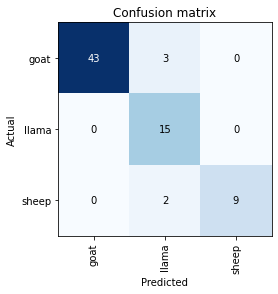

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [13]:
learn.dls.vocab

['goat', 'llama', 'sheep']

In [18]:
pred,pred_idx,probs = learn.predict(PILImage.create('llama.jpg'))
print(f"Gambar qurban hasil upload adalah {pred} dengan probabilitas {probs[pred_idx]:.4f}")

Gambar qurban hasil upload adalah llama dengan probabilitas 0.8014


In [19]:
learn.export("qurban.pkl")